In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")

# Класс `KernelDensity`

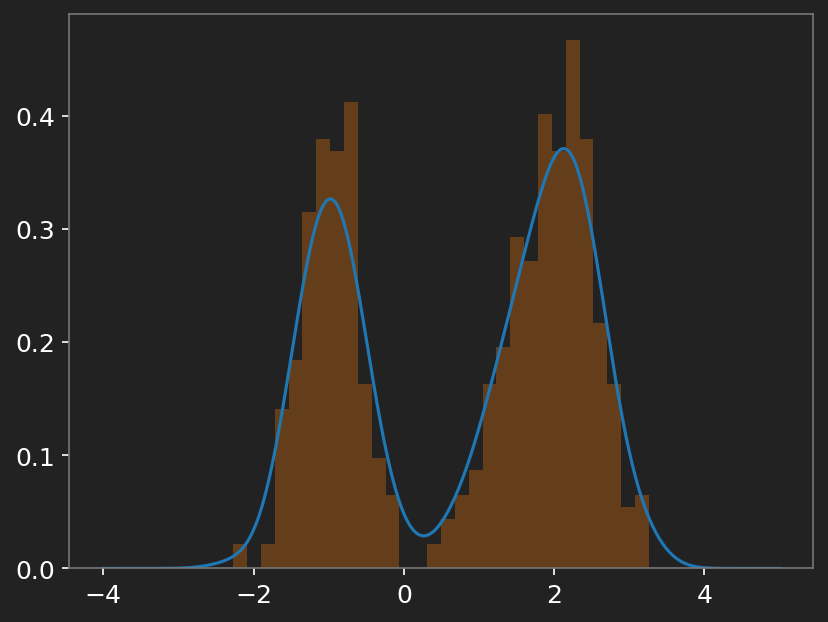

In [3]:
from sklearn.neighbors import KernelDensity

# данные
X = np.concatenate([np.random.normal(-1, 0.4, 200),
                    np.random.normal( 2, 0.6, 300)])[:, None]

# KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(X)
xs = np.linspace(-4, 5, 400)[:, None]
log_dens = kde.score_samples(xs)
dens = np.exp(log_dens)

plt.plot(xs[:,0], dens)
plt.hist(X[:,0], bins=30, density=True, alpha=0.3)
plt.show()

# Вручную

In [6]:
def gaussian_kernel(x):
    return np.exp(-(x**2) / 2) / np.sqrt(2 * np.pi)

def gaussian_kernel_h(x, h):
    return gaussian_kernel(x/h) / h

def get_kde(x, sample, kernel, h=0.1):
    s = np.sum(kernel(sample - x, h))
    return s / len(sample)

Сгенерируем выборку по лог-нормальному распределению:

In [5]:
lognormal_sample = np.random.lognormal(mean=0., sigma=0.5, size=10000)

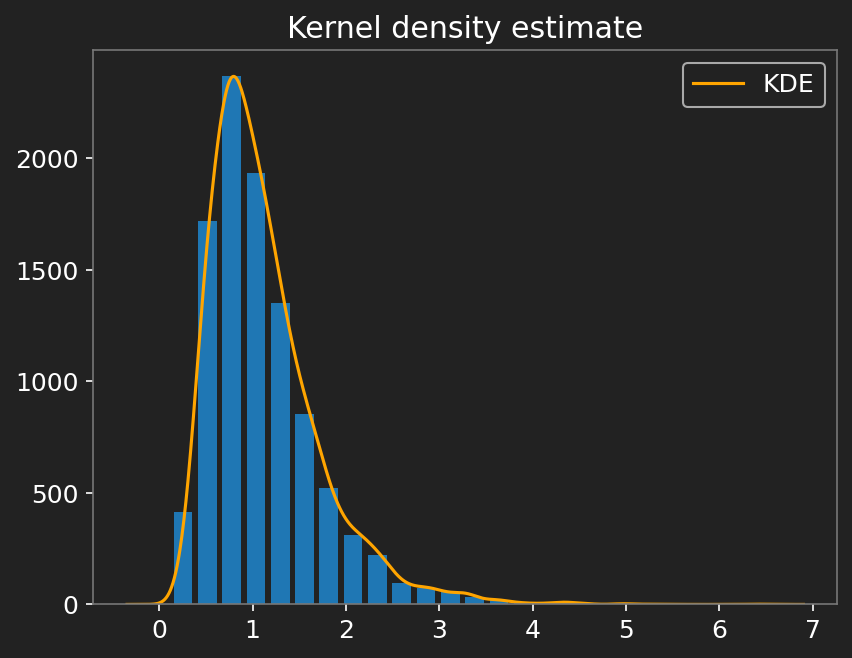

In [8]:
min_value, max_value = lognormal_sample.min(), lognormal_sample.max()

space = np.linspace(min_value-0.5, max_value+0.5, 1000)
kde = np.zeros(len(space))
for i in range(len(space)):
    kde[i] = get_kde(space[i], lognormal_sample, gaussian_kernel_h)

hist, bins = np.histogram(lognormal_sample, bins=24)
plt.hist(lognormal_sample, bins=24, width=.2)

scaler =  hist.max() / kde.max()
plt.plot(space, kde*scaler, color='orange', label='KDE')
plt.legend()
plt.title("Kernel density estimate")
plt.show()